# 1. Install Requirements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = "../../data/ISOT_Fake_News/"

fake_df = pd.read_csv(f"{base_path}Fake.csv")
true_df   = pd.read_csv(f"{base_path}True.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Add label column to display what information is fake and what is true
true_df['label'] = 1
fake_df['label'] = 0

In [6]:
df = pd.concat([fake_df, true_df]).sample(frac=1)

In [7]:
df

,title,text,subject,date,label
9784,NEW VIDEO…ANTIFA Terror Group INFILTRATED…Tran...,Steven Crowder is an amazing and ALWAYS unafra...,politics,"Sep 29, 2017",0
12175,SEE YA MITT! TRUMP Reportedly Chooses Exxon Mo...,The Wall Street Journal reported on Friday tha...,politics,"Dec 10, 2016",0
6397,"Internet Trolls Zimmerman, Top Bid Of $65 Mil...",Quick thinking trolls have taken a novel appro...,News,"May 13, 2016",0
22336,"WAR ON WORDS: Facebook Censorship Widens, Webs...",21st Century Wire says The US media s neoMcCar...,US_News,"December 3, 2016",0
15859,Spanish prosecutor asks judge to jail Catalan ...,MADRID (Reuters) - Spain s state prosecutor on...,worldnews,"November 2, 2017",1
...,...,...,...,...,...
22708,The Jerusalem Decision: From Creative Chaos to...,Dr Can Erimtan 21st Century WireDid Donald J....,Middle-east,"December 28, 2017",0
10796,TRIGGERED! FORMER CIA AGENT: ‘Trey Gowdy Ought...,Former CIA Agent Phil Mudd is a jackwagon! He ...,politics,"May 24, 2017",0
22945,Secret Service Laptop Reportedly ‘Stolen’ had ...,21st Century Wire says A laptop was reportedly...,Middle-east,"March 17, 2017",0
21487,FLASHBACK: UNCOVERED VIDEO SHOWS HYPOCRITE HAR...,In 1993 Harry Reid wrote the Immigration Stabi...,left-news,"Aug 23, 2015",0


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

<Axes: ylabel='subject'>

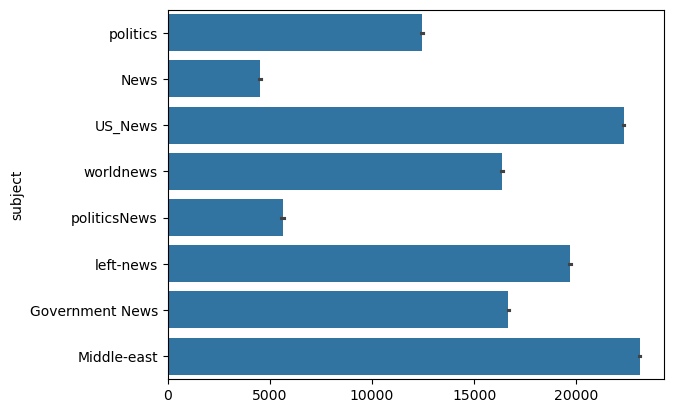

In [9]:
sns.barplot(df['subject'], legend=False)

In [10]:
group = df.groupby(['subject', 'label']).size().reset_index(name='count')
group

,subject,label,count
0,Government News,0,1570
1,Middle-east,0,778
2,News,0,9050
3,US_News,0,783
4,left-news,0,4459
5,politics,0,6841
6,politicsNews,1,11272
7,worldnews,1,10145


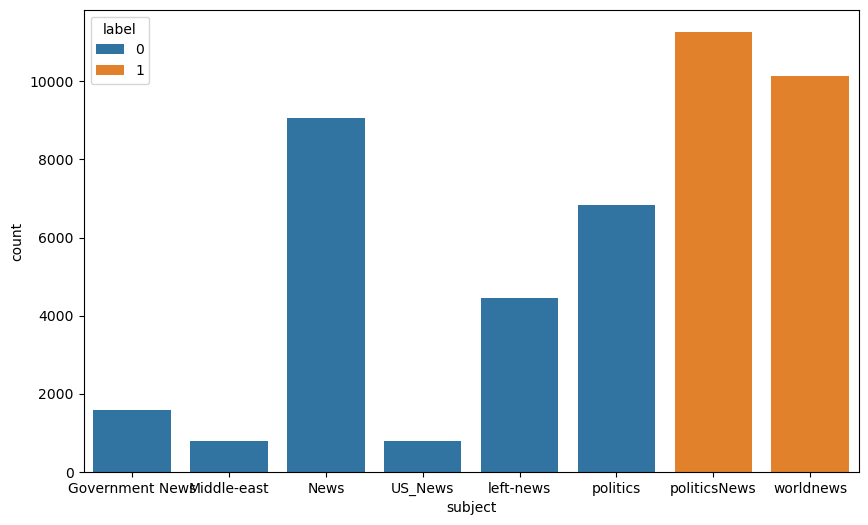

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(group, x='subject', y='count', hue='label')
plt.show()

## Remove/Fix The Unneeded
### 1. Get rid of unneeded columns

In [13]:
df.drop(columns=['title', 'subject', 'date'], inplace=True)

In [14]:
df

,text,label
9784,Steven Crowder is an amazing and ALWAYS unafra...,0
12175,The Wall Street Journal reported on Friday tha...,0
6397,Quick thinking trolls have taken a novel appro...,0
22336,21st Century Wire says The US media s neoMcCar...,0
15859,MADRID (Reuters) - Spain s state prosecutor on...,1
...,...,...
22708,Dr Can Erimtan 21st Century WireDid Donald J....,0
10796,Former CIA Agent Phil Mudd is a jackwagon! He ...,0
22945,21st Century Wire says A laptop was reportedly...,0
21487,In 1993 Harry Reid wrote the Immigration Stabi...,0


### 2. Get rid of duplications

In [16]:
# Check any duplications
df.duplicated().sum()

6251

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

## Text Cleaning
### 1. Remove HTML in texts

In [42]:
from bs4 import BeautifulSoup
has_html = df[df['text'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))]

C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\1097152562.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  has_html = df[df['text'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))]
C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\1097152562.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  has_html = df[df['text'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))]


In [43]:
has_html

,text,label
2597,"On Thursday, Donald Trump was devastated after...",0
21856,Meet Keegan Stephan. He could be Barack Obama ...,0
10008,WASHINGTON (Reuters) - The U.S. State Departme...,1
18898,To say the leftists in the media are completel...,0
17983,Hillary was in the middle of a book signing fo...,0
10630,Today s testimony between AG Sessions and Sena...,0
15881,There are just way too many wannabe male and f...,0
7602,Donald Trump s campaign has hit a new low as...,0
21720,My success in the financial markets has given...,0
8481,Rarely in life do you see people go so perfect...,0


In [44]:
df.iloc[2597]['text']

'NAIROBI (Reuters) - Kenya opposition leader Raila Odinga urged supporters to boycott Thursday s repeat presidential election and persuade their friends to do the same, saying his opposition movement would be transformed into a resistance movement against the government.   From today we are transforming the NASA coalition into a resistance movement,  he told a cheering crowd of thousands of people in Uhuru Park in the capital of Nairobi. He wants new elections held within 90 days, he said.  '

In [45]:
import re
def cleanHTML(text):
    # Use beautifulSoup to remove simple HTML code
    text = BeautifulSoup(text, "html.parser").get_text()
    # HTML like < /script> slip past BeautifulSoup seen on df.iloc[1153]['text']
    regex = re.compile('<[^>]+>')
    text = regex.sub('', text)
    return text

In [46]:
df['text'] = df.apply(lambda x: cleanHTML(x['text']), axis=1)

C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\3494864991.py:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\3494864991.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [47]:
df.iloc[1153]['text']

'Jon Ritzheimer, infamous right-wing terrorist and incredible douchebag, barely squeaks by on his government disability check and has said that he is  thankful to have a wife who works.  As it turns out, experts tell us that this guy who spends his days fighting imaginary battles and sucking up a good man s oxygen isn t the exception to the demographics that make up a right-wing terrorist militia, he s the definition. These guys are broke,  said Mark Pitcavage, who has been researching far-right movements for 22 years and has studied the Harney County occupiers.  Right-wing extremists, generally speaking, have very little money. How a right-wing extremist occupation like the one in Oregon would pay for itself isn t exactly an issue there s been a lot of data on. By referencing the research of people like Pitcavage, we can deduce that right-wing extremists are for the most part freeloaders, likened to teenagers who think they can take care of themselves but overwhelmed the first time th

### 2. Remove @ in texts

In [49]:
def cleanAts(text):
    # Remove (@name) 
    regex = re.compile('\(@\w+\)')
    text = regex.sub('', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\104128625.py:3: SyntaxWarning: invalid escape sequence '\('
  regex = re.compile('\(@\w+\)')


In [50]:
df['text'] = df.apply(lambda x: cleanAts(x['text']), axis=1)

In [51]:
df.iloc[1153]['text']

'Jon Ritzheimer, infamous right-wing terrorist and incredible douchebag, barely squeaks by on his government disability check and has said that he is  thankful to have a wife who works.  As it turns out, experts tell us that this guy who spends his days fighting imaginary battles and sucking up a good man s oxygen isn t the exception to the demographics that make up a right-wing terrorist militia, he s the definition. These guys are broke,  said Mark Pitcavage, who has been researching far-right movements for 22 years and has studied the Harney County occupiers.  Right-wing extremists, generally speaking, have very little money. How a right-wing extremist occupation like the one in Oregon would pay for itself isn t exactly an issue there s been a lot of data on. By referencing the research of people like Pitcavage, we can deduce that right-wing extremists are for the most part freeloaders, likened to teenagers who think they can take care of themselves but overwhelmed the first time th

### 3. Remove URL and Pictures in texts

In [53]:
df.iloc[2]['text']

'Quick thinking trolls have taken a novel approach to shutting down George Zimmerman s disgraceful gun auction for the weapon he used to murder 17-year-old Trayvon Martin: Bid absurdly high and make it all but impossible for Zimmerman s racist fans to get a legitimate number.Enter user  Racist McShootface , who took it upon him or herself to  pay  a whopping $65 million for the murder weapon. Only he or she never intended to actually pay. Instead, Zimmerman s auction has gone haywire. After Mr. McShootface was deleted, another user named  Tamir Rice  after the 12-year-old boy who was killed by Cleveland police, jumped into the fray. Others have joined in as well.screengrab via GawkerZimmerman has had an extremely difficult time selling the gun he used to shoot Trayvon with. His initial auction was suspended after major outrage swept nearly every corner of the internet. His second auction was also deleted. Now his third is being systematically destroyed from within by trolls hoping to m

In [54]:
def cleanURLandPic(text):
    # Remove URL and pic (only https for now)
    regex = re.compile('https?://\S+|www\.\S+|pic\.twitter\.com/\S+')
    text = regex.sub('', text)
    
    return text

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\348221683.py:3: SyntaxWarning: invalid escape sequence '\S'
  regex = re.compile('https?://\S+|www\.\S+|pic\.twitter\.com/\S+')


In [55]:
df['text'] = df.apply(lambda x: cleanURLandPic(x['text']), axis=1)

In [56]:
df.iloc[2]['text']

'Quick thinking trolls have taken a novel approach to shutting down George Zimmerman s disgraceful gun auction for the weapon he used to murder 17-year-old Trayvon Martin: Bid absurdly high and make it all but impossible for Zimmerman s racist fans to get a legitimate number.Enter user  Racist McShootface , who took it upon him or herself to  pay  a whopping $65 million for the murder weapon. Only he or she never intended to actually pay. Instead, Zimmerman s auction has gone haywire. After Mr. McShootface was deleted, another user named  Tamir Rice  after the 12-year-old boy who was killed by Cleveland police, jumped into the fray. Others have joined in as well.screengrab via GawkerZimmerman has had an extremely difficult time selling the gun he used to shoot Trayvon with. His initial auction was suspended after major outrage swept nearly every corner of the internet. His second auction was also deleted. Now his third is being systematically destroyed from within by trolls hoping to m

### 4. Remove extra Whitespaces

In [58]:
def cleanExtraWhitespaces(text):
    # Remove whitespace
    regex = re.compile('\s+')
    text = regex.sub(' ', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yanni\AppData\Local\Temp\ipykernel_37296\2150091073.py:3: SyntaxWarning: invalid escape sequence '\s'
  regex = re.compile('\s+')


In [59]:
df['text'] = df.apply(lambda x: cleanExtraWhitespaces(x['text']), axis=1)

In [60]:
df.iloc[2]['text']

'Quick thinking trolls have taken a novel approach to shutting down George Zimmerman s disgraceful gun auction for the weapon he used to murder 17-year-old Trayvon Martin: Bid absurdly high and make it all but impossible for Zimmerman s racist fans to get a legitimate number.Enter user Racist McShootface , who took it upon him or herself to pay a whopping $65 million for the murder weapon. Only he or she never intended to actually pay. Instead, Zimmerman s auction has gone haywire. After Mr. McShootface was deleted, another user named Tamir Rice after the 12-year-old boy who was killed by Cleveland police, jumped into the fray. Others have joined in as well.screengrab via GawkerZimmerman has had an extremely difficult time selling the gun he used to shoot Trayvon with. His initial auction was suspended after major outrage swept nearly every corner of the internet. His second auction was also deleted. Now his third is being systematically destroyed from within by trolls hoping to make i

In [61]:
df.head()

,text,label
9784,Steven Crowder is an amazing and ALWAYS unafra...,0
12175,The Wall Street Journal reported on Friday tha...,0
6397,Quick thinking trolls have taken a novel appro...,0
22336,21st Century Wire says The US media s neoMcCar...,0
15859,MADRID (Reuters) - Spain s state prosecutor on...,1


In [48]:
df.to_excel("cleaned_ISOT_Fake_News_data.xlsx")